<a href="https://colab.research.google.com/github/db030220/Plogging/blob/main/trashlearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

In [3]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.utils.image_utils import load_img,img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#이미지 불리기
for i in range(1,200):
  fname='/content/drive/MyDrive/2023finalproject/img3/hand/손있는봉투{}.jpg'.format(i)
  file_name_freq=1
  data_aug_gen =ImageDataGenerator(rescale=1./255,
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8,2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
  img=load_img(fname)
  x=img_to_array(img)
  x=x.reshape((1,)+x.shape)
  i=0
  file_name_freq+=1
  save_to_dir="/content/drive/MyDrive/2023finalproject/img3/hand/"
  for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir=save_to_dir, save_prefix='puls_'+str(file_name_freq), save_format='jpg'):
      i+=1
      if i>5:
        break


In [14]:
caltech_dir = "/content/drive/MyDrive/2023finalproject/img3/"
categories = ["person","hand","trash"]
nb_classes = len(categories)

image_w=64
image_h=64
pixels = image_h* image_w*3
X=[]
y=[]

for idx, cat in enumerate(categories):
  label=[0 for i in range(nb_classes)]
  label[idx] =1
  image_dir=caltech_dir +"/"+cat
  files=glob.glob(image_dir+"/*.jpg")
  print(cat, " 파일길이 : ", len(files))
  for i, f in enumerate(files):
    img=Image.open(f)
    img=img.convert("RGB")
    img=img.resize((image_w,image_h))
    data=np.asarray(img)

    X.append(data)
    y.append(label)

    if i%700==0:
      print(cat," : ",f)

X=np.array(X)
y=np.array(y)

X_train,X_test,y_train,y_test=train_test_split(X,y)
xy=(X_train, X_test,y_train,y_test)
np.save("/content/drive/MyDrive/2023finalproject/data.npy",xy)

print("ok",len(y))
#데이터증강완료

person  파일길이 :  1004
person  :  /content/drive/MyDrive/2023finalproject/img3//person/사람5.jpg
person  :  /content/drive/MyDrive/2023finalproject/img3//person/puls_2_0_3767.jpg
hand  파일길이 :  987
hand  :  /content/drive/MyDrive/2023finalproject/img3//hand/손있는봉투2.jpg
hand  :  /content/drive/MyDrive/2023finalproject/img3//hand/puls_2_0_180.jpg
trash  파일길이 :  1003
trash  :  /content/drive/MyDrive/2023finalproject/img3//trash/쓰레기봉투만5.jpg
trash  :  /content/drive/MyDrive/2023finalproject/img3//trash/쓰레기봉투만603.jpg
ok 2994


/usr/local/lib/python3.9/dist-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.2.0


In [15]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.backend import set_session as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
#버전이상으로 변경
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/2023finalproject/data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(2245, 64, 64, 3)
2245


In [16]:
categories = ["person","hand","trash"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [17]:
with tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)
    
    

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])


Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 1.1344 - accuracy: 0.4209
Epoch 1: val_loss improved from inf to 0.93868, saving model to ./model/multi_img_classification.model


71/71 [==============================] - 26s 355ms/step - loss: 1.1344 - accuracy: 0.4209 - val_loss: 0.9387 - val_accuracy: 0.5941
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 0.8533 - accuracy: 0.6116
Epoch 2: val_loss improved from 0.93868 to 0.82648, saving model to ./model/multi_img_classification.model


71/71 [==============================] - 23s 325ms/step - loss: 0.8533 - accuracy: 0.6116 - val_loss: 0.8265 - val_accuracy: 0.6235
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 0.7337 - accuracy: 0.6891
Epoch 3: val_loss improved from 0.82648 to 0.80231, saving model to ./model/multi_img_classification.model


71/71 [==============================] - 26s 363ms/step - loss: 0.7337 - accuracy: 0.6891 - val_loss: 0.8023 - val_accuracy: 0.6449
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.7292
Epoch 4: val_loss improved from 0.80231 to 0.79947, saving model to ./model/multi_img_classification.model


71/71 [==============================] - 26s 362ms/step - loss: 0.6696 - accuracy: 0.7292 - val_loss: 0.7995 - val_accuracy: 0.6555
Epoch 5/30
71/71 [==============================] - ETA: 0s - loss: 0.5928 - accuracy: 0.7599
Epoch 5: val_loss improved from 0.79947 to 0.76199, saving model to ./model/multi_img_classification.model


71/71 [==============================] - 23s 320ms/step - loss: 0.5928 - accuracy: 0.7599 - val_loss: 0.7620 - val_accuracy: 0.6822
Epoch 6/30
71/71 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.8107
Epoch 6: val_loss did not improve from 0.76199
71/71 [==============================] - 24s 344ms/step - loss: 0.4992 - accuracy: 0.8107 - val_loss: 0.7769 - val_accuracy: 0.6809
Epoch 7/30
71/71 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.8236
Epoch 7: val_loss did not improve from 0.76199
71/71 [==============================] - 21s 299ms/step - loss: 0.4355 - accuracy: 0.8236 - val_loss: 0.7841 - val_accuracy: 0.6809
Epoch 8/30
71/71 [==============================] - ETA: 0s - loss: 0.3618 - accuracy: 0.8646
Epoch 8: val_loss did not improve from 0.76199
71/71 [==============================] - 23s 321ms/step - loss: 0.3618 - accuracy: 0.8646 - val_loss: 0.8310 - val_accuracy: 0.6822
Epoch 9/30
71/71 [==============================]

In [20]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

24/24 [==============================] - 2s 80ms/step - loss: 0.9540 - accuracy: 0.6836
정확도 : 0.6836


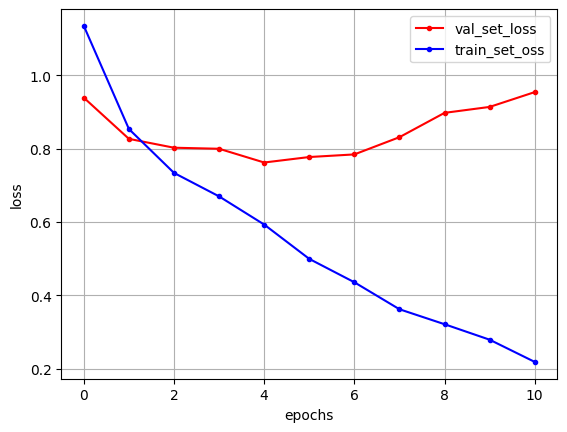

In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [22]:
!echo "# Plogging" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/db030220/Plogging.git
!git push -u origin main

Initialized empty Git repository in /content/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@e3f27ee1993a.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/db030220/Plogging.git'
